In [318]:
import KNN
from imp import reload
import numpy as np
import operator as op

### 准备数据：数据解析

In [319]:
def file2matrix(filename):
    fr=open(filename)  # 打开文件
    arrayOLines=fr.readlines() # 读取文件
    numberOfLines=len(arrayOLines) # 获取文件行数
    returnMat=np.zeros((numberOfLines,3)) # 创建一个行数等于文件行数，列数为3的矩阵
    classLabelVector=[]
    index=0
    for line in arrayOLines: # 对文件中每一行，执行如下操作
        line=line.strip() # 移出字符串收尾字符
        listFromLine=line.split('\t') # 按照换行符进行分割
        returnMat[index,:]=listFromLine[0:3]  # 将每一行的第0到第3（不包含）个值 赋值给 returnMat矩阵的第index行，每个列的值
        try:
            classLabelVector.append(int(listFromLine[-1])) # 标签为listFromLine的最后一个值
        except ValueError:
            pass
        index+=1 # 行数+1
    return returnMat,classLabelVector # 返回标准训练集矩阵，以及 对应的标签数据集
        

In [320]:
datingDataMat,datingLabels=file2matrix('datingTestSet2.txt')

### 使用matplotlib创建散点图

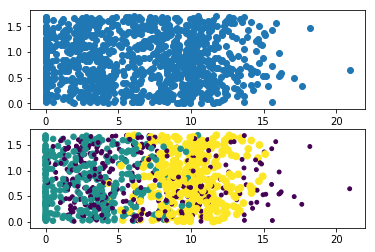

In [321]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure() # 创建视图
ax=fig.add_subplot(211) # 创建子视图，每个subplot创建一个子图(2*1大小的视图，在第一个位置/ 2行1列，第一个位置)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2]) # 使用训练集的第二列、第三列数据作为横纵坐标

ax2=fig.add_subplot(212) # 创建视图（2*1大小的视图，在第二个位置/2行1列，第二个位置）
ax2.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels)) # 绘制散点图时增加颜色和尺寸
plt.show()

### 归一化数值

In [322]:
def autoNorm(dataSet):
    minVals=dataSet.min(0) # 每列的最小值
    maxVals=dataSet.max(0) # 每列的最大值
    ranges=maxVals-minVals
    normalDataSet=np.zeros(np.shape(dataSet))
    m=dataSet.shape[0]
    normalDataSet=dataSet-np.tile(minVals,(m,1))
    normalDataSet=normalDataSet/np.tile(ranges,(m,1))
    return normalDataSet,ranges,minVals

In [323]:
normMat,ranges,minVals=autoNorm(datingDataMat)

### 测试算法

In [324]:
def datingClassTest():
    hoRatio=0.10
    datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    m=normMat.shape[0]
    print(m)
    numTestVecs=int(m*hoRatio)
    print(numTestVecs)
    errorCount=0.0
    for i in range(numTestVecs):
        classifiterResult = KNN.classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print ("the classifier came back with : %s, the real answer is: %s" % (classifierResult,datingLabels[i]))
        if(calssifierResult !=datingLabels[i]):
            errorCount+=1
    print ("the total error rate is: %f" %(errorCount/float(numTestVecs)))

In [325]:
#datingClassTest()

### 构建完整可用系统：使用算法

In [326]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing videa games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)
    print("you will probably like this person: ", resultList[int(classifierResult) - 1])

In [327]:
classifyPerson()

percentage of time spent playing videa games?1000
frequent flier miles earned per year?1500000
liters of ice cream consumed per year?0.2
[50.02940297 50.18131277 50.3926365  49.6902693  50.33806011 49.83629528
 50.11617847 49.79756827 49.92237144 49.87382219 50.20497266 49.95455632
 50.30947796 50.15802887 49.58477989 50.30954275 49.99703751 49.65940832
 50.4969933  49.97574328 50.36693595 50.28175984 50.22957115 50.14852454
 50.35899347 49.85557654 50.53563783 49.99752759 50.46348548 50.39505063
 49.88378113 50.39456967 50.11226419 50.05999541 50.07471329 49.86058959
 50.07436256 50.42801348 49.84984556 49.86105837 50.23774564 50.48521177
 50.06440006 50.00029155 49.87914044 50.25996901 50.32899163 50.27742673
 50.25532801 50.33918475 50.23613977 49.68399269 49.93912553 50.3846265
 50.4268101  50.3043245  50.37071465 50.00883808 49.82808472 50.42853129
 50.21242447 50.33431989 50.41378305 50.09110706 50.24155657 50.19621579
 49.9966613  50.36024165 49.95781271 49.86992245 50.43907453 